# **Popularity of the Top Songs on Spotify in 2020-2021**
Vidit Makwana and Sophie Jorgensen

# *1. Introduction*
Since 2008, Spotify has serviced a low-cost platform for users to listen to unlimited amounts of music. With over 172 million subscribers, it constantly garners several statistics on users' listening metrics, including information on worldwide song streams, overall song popularity, users' favorite genres, and much more. In this data set, we look at all of the songs that have been on the Spotify Global Top 200 Chart within the years 2020-2021 (through July 30, 2021). [Click here to view the songs on the current Spotify Top 200 Chart.](https://www.spotifycharts.com/regional/global/weekly/) <br><br>

Besides basic information like song title, artist, and number of streams, the data includes measures of the top-charting song's popularity, danceability, energy, loudness, speechiness, acousticness, liveness, tempo, and valence. 

To ease understanding, we define several of the included attributes:    

* ***Popularity:*** The popularity of the song, valued between 0 and 100 (highest popularity).

* ***Danceability:*** Describes how fit a song is for dancing, based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. Valued between 0.0 and 1.0 (highest danceability). 

* ***Acousticness:*** Describes whether a song is acoustic, valued from 0.0 to 1.0 (highly acoustic).

* ***Energy:*** Measures a song's intensity and activity, valued from 0.0 to 1.0 (more energetic -- generally louder and faster).

* ***Loudness:*** Describes the loudness of a track in decibels (dB), averaged across the whole song. Valued from -60 to 0 dB (high loudness).

* ***Speechiness:*** Measures the presence of verbal words in a track, valued from 0.0 to 1.0 (higher speechiness -- generally closer to podcasts, poetry, etc.). 

* ***Tempo:*** Measures the overall tempo (speed or pace) of a song, valued in beats per minute (BPM). 

* ***Valence:*** Describes the musical positiveness of a song, valued from 0.0 to 1.0 (high positivity -- generally sounding happier and more euphoric).

<br></br>
Below, we'll use [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to put our data in a pandas dataframe.

In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv("spotify_dataset.csv")
df.head(10)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",2021-03-31,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,97,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
6,7,3,16,2021-05-14--2021-05-21,Kiss Me More (feat. SZA),"29,356,736",Doja Cat,8640063,748mdHapucXQri7IAO8yFK,"['dance pop', 'pop']",2021-04-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,94,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742,G#/Ab
7,8,2,10,2021-06-18--2021-06-25,Todo De Ti,"26,951,613",Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",2021-05-20,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,95,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
8,9,3,8,2021-06-18--2021-06-25,Yonaguni,"25,030,128",Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",2021-06-04,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,96,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44,C#/Db
9,10,8,10,2021-07-02--2021-07-09,I WANNA BE YOUR SLAVE,"24,551,591",Måneskin,3377762,4pt5fDVTg5GhEvEtlz9dKk,"['indie rock italiano', 'italian pop']",2021-03-19,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,95,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958,C#/Db


# *2. Data Tidying*

Before we begin to explore and analyze the data, we need to clean our dataset. Tidying it gets it in shape for extracting meaningful information in our analysis. To clean this data, we are going to check for and handle three things:
<ol type="1">
<li>Missing Values</li> 
<li>Shrinking the dataframe to exclude irrelevant columns</li> 
<li>Column Data Types</li> 
</ol>

### 2.1 Missing Values

Our first step is to check the data for missing values, as an abundance of missing column values from rows may skew our analysis. To do so, we use pandas' isna() method to check for null values in any of the columns. By using the sum() function, our output should show how many null values are in each column.

In [ ]:
df.isna().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

We can see that none of the columns seem to have null values, which seems good upon quick glance. However, looking further into our dataset, we can see that some of the columns' values are actually blank strings with no information. Let's iterate through the dataset and check for these blank values, printing out the song and artist each time. We'll start with the Song ID column, as that helps identify the uniqueness of a song.

In [ ]:
for index, row in df.iterrows():
  song_id = row['Song ID']
  if song_id == " ":
    print(row['Song Name'] + " by " + row['Artist'])

NOT SOBER (feat. Polo G & Stunna Gambino) by The Kid LAROI
34+35 by Ariana Grande
Richer (feat. Polo G) by Rod Wave
34+35 Remix (feat. Doja Cat, Megan Thee Stallion) - Remix by Ariana Grande
Driving Home for Christmas - 2019 Remaster by Chris Rea
Thank God It's Christmas - Non-Album Single by Queen
Agua (with J Balvin) - Music From "Sponge On The Run" Movie by Tainy
Lean (feat. Towy, Osquel, Beltito & Sammy & Falsetto) by Super Yei, Jone Quest
+Linda by Dalex
In meinem Benz by AK AUSSERKONTROLLE, Bonez MC
fuck, i'm lonely (with Anne-Marie) - from “13 Reasons Why: Season 3” by Lauv


From this, we can see that eleven songs fit this criteria. To see if blank values appear in other columns for the same song (meaning we may want to get rid of these rows), let's iterate again and check for song Popularity, Acousticness, and Valence.

In [ ]:
for index, row in df.iterrows():
  popularity = row['Popularity']
  if popularity == " ":
    print("Popularity missing for: " + row['Song Name'] + " by " + row['Artist'])
  valence = row['Valence']
  if valence == " ":
    print("Valence missing for: " + row['Song Name'] + " by " + row['Artist'])
  acousticness = row['Acousticness']
  if acousticness == " ":
    print("Acousticness missing for: " + row['Song Name'] + " by " + row['Artist'] + "\n")

Popularity missing for: NOT SOBER (feat. Polo G & Stunna Gambino) by The Kid LAROI
Valence missing for: NOT SOBER (feat. Polo G & Stunna Gambino) by The Kid LAROI
Acousticness missing for: NOT SOBER (feat. Polo G & Stunna Gambino) by The Kid LAROI

Popularity missing for: 34+35 by Ariana Grande
Valence missing for: 34+35 by Ariana Grande
Acousticness missing for: 34+35 by Ariana Grande

Popularity missing for: Richer (feat. Polo G) by Rod Wave
Valence missing for: Richer (feat. Polo G) by Rod Wave
Acousticness missing for: Richer (feat. Polo G) by Rod Wave

Popularity missing for: 34+35 Remix (feat. Doja Cat, Megan Thee Stallion) - Remix by Ariana Grande
Valence missing for: 34+35 Remix (feat. Doja Cat, Megan Thee Stallion) - Remix by Ariana Grande
Acousticness missing for: 34+35 Remix (feat. Doja Cat, Megan Thee Stallion) - Remix by Ariana Grande

Popularity missing for: Driving Home for Christmas - 2019 Remaster by Chris Rea
Valence missing for: Driving Home for Christmas - 2019 Rema

We see the same songs show up again, suggesting that their data values are largely incomplete. Since it is only 11 songs, we first consider imputing. Imputation is a method to replace missing data with estimated values based on available information. We could search for information on the web and directly impute these values, if found from a trusted source, or we could average values from existing columns (such as [mean imputation](https://www.geeksforgeeks.org/how-to-fill-nan-values-with-mean-in-pandas/)). However, these column features are pretty niche (acousticness and valence, for example), and thus may be hard to track down accurately on the Internet. Furthermore, a quick scan of the head of the dataframe shows the column values to be "all over the place," with high variability, and thus we feel that removing these 11 rows may be better than using mean imputation or a similar technique to fill the missing values. 

In [ ]:
len(df) # Check length of dataframe

1556

After checking the length of our dataframe and seeing that the 11 rows only make up ~0.7% of our data, we feel comfortable dropping these rows entirely.

In [ ]:
# Drop rows where popularity is blank, meaning that other values in the row are blank as well
df = df[df.Popularity != " "]

# Check new length of dataframe
len(df)

1545

Since 1556-1545=11, we have successfully removed the 11 rows from our dataframe.

### 2.2 Shrinking the dataframe to exclude irrelevant columns

Now that we have handled missing data, we will drop columns that will not be crucial to our analysis. Since Song ID is unique to each song, that may not be helpful in collective analysis. We won't use Chord or Weeks Charted either. We can use [pandas.DataFrame.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) to do this smoothly.

In [ ]:
df = df.drop(columns=['Weeks Charted', 'Chord', 'Song ID'])  
list(df.columns.values)

['Index',
 'Highest Charting Position',
 'Number of Times Charted',
 'Week of Highest Charting',
 'Song Name',
 'Streams',
 'Artist',
 'Artist Followers',
 'Genre',
 'Release Date',
 'Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence']

Visually, we can see that these columns were successfully dropped.

### 2.3 Column Data Types

For painless analysis and data visualization, we need to ensure that these columns are of proper types. We can use [pandas.DataFrame.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method to check the column types in the dataframe.


In [ ]:
# Display metadata about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1545 non-null   int64 
 1   Highest Charting Position  1545 non-null   int64 
 2   Number of Times Charted    1545 non-null   int64 
 3   Week of Highest Charting   1545 non-null   object
 4   Song Name                  1545 non-null   object
 5   Streams                    1545 non-null   object
 6   Artist                     1545 non-null   object
 7   Artist Followers           1545 non-null   object
 8   Genre                      1545 non-null   object
 9   Release Date               1545 non-null   object
 10  Popularity                 1545 non-null   object
 11  Danceability               1545 non-null   object
 12  Energy                     1545 non-null   object
 13  Loudness                   1545 non-null   object
 14  Speechin

Here, we can see that a large majority of columns are of type "object," which in [pandas represents a "string" type](https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/). If we are going to graph or plot these features we likely want some of them to be numeric types. So, let's convert relevant columns to to numeric types as such. From looking at the dataframe head, we can see that "Streams" has some commas that may interfere with seamless numeric casting. Let's remove those before trying to cast, and check that the in-place updating worked.

In [ ]:
# Replace commas in the Streams column
df["Streams"] = [str(i).replace(',', '')for i in df["Streams"]]
df.head(3)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688


Before doing multi-column casting, let's also update the Duration column to record a song's length in seconds rather than milliseconds. Seconds will be easier for the viewer to conceptualize when analyzing the data and graphs.

In [ ]:
df["Duration (ms)"] = [float(i)/1000 for i in df["Duration (ms)"]]
df.head(3)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211.560,0.589
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141.806,0.478
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178.147,0.688


Since then "ms" label no longer applies, we'll rename the Duration column accordingly, too, using [pandas.DataFrame.rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html).

In [ ]:
df = df.rename(columns={'Duration (ms)': 'Duration (s)'})

We're finally ready to convert all the columns to their proper numeric type, if applicable. We'll use [pandas.to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html), which is nice because it automatically infers whether a float or int type is better for the column and casts it as such.

In [ ]:
# Convert multiple columns to numeric type via the apply() method
df[["Streams", "Artist Followers", "Popularity","Danceability", "Energy", 
    "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo", "Valence", 
    "Duration (s)"]] = df[["Streams", "Artist Followers", "Popularity",
                          "Danceability", "Energy", "Loudness", "Speechiness", 
                           "Acousticness", "Liveness", "Tempo", "Valence", 
                           "Duration (s)"]].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1545 non-null   int64  
 1   Highest Charting Position  1545 non-null   int64  
 2   Number of Times Charted    1545 non-null   int64  
 3   Week of Highest Charting   1545 non-null   object 
 4   Song Name                  1545 non-null   object 
 5   Streams                    1545 non-null   int64  
 6   Artist                     1545 non-null   object 
 7   Artist Followers           1545 non-null   int64  
 8   Genre                      1545 non-null   object 
 9   Release Date               1545 non-null   object 
 10  Popularity                 1545 non-null   int64  
 11  Danceability               1545 non-null   float64
 12  Energy                     1545 non-null   float64
 13  Loudness                   1545 non-null   float

We can see that all of the numeric columns are now of type float64 or int64. Next, let's handle the remaining columns. We have Week of Highest Charting, Song Name, Artist, Genre, and Release Date left. Looking at Week of Highest Charting and Release Date columns, we can see that the first 10 characters of each column are in the format "yyyy-mm-dd". Using [datetime's strptime() function](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior), we should be able to convert these values to datetimes.

*Note:* Even though Week of Highest Charting spans a seven day period, we will just use the first day of that week for easier conversion and analysis while still maintaining the substance of the column.

In [ ]:
import datetime

# Recording "yyyy-mm-dd" format
format = '%Y-%m-%d'

# Convert the first ten characters of each column value to a datetime date,
# assigning a None value for values that do not fit the format
df["Release Date"] = df['Release Date'].apply(lambda x: datetime.datetime.strptime(str(x), format).date() if len(str(x)) > 9 else None)
df["Week of Highest Charting"] = df['Week of Highest Charting'].apply(lambda x: datetime.datetime.strptime(str(x)[0:10], format).date() if len(str(x)[0:10]) == 10 else None)

# Explicitly label these columns as datetime types
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Week of Highest Charting'] = pd.to_datetime(df['Week of Highest Charting'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Index                      1545 non-null   int64         
 1   Highest Charting Position  1545 non-null   int64         
 2   Number of Times Charted    1545 non-null   int64         
 3   Week of Highest Charting   1545 non-null   datetime64[ns]
 4   Song Name                  1545 non-null   object        
 5   Streams                    1545 non-null   int64         
 6   Artist                     1545 non-null   object        
 7   Artist Followers           1545 non-null   int64         
 8   Genre                      1545 non-null   object        
 9   Release Date               1528 non-null   datetime64[ns]
 10  Popularity                 1545 non-null   int64         
 11  Danceability               1545 non-null   float64       
 12  Energy

Now, we only have three columns left to handle: Genre, Artist, and Song Name. It makes sense for Artist and Song Name to be string types, so we'll leave those as-is. Looking at Genre, we can see that it is a string that looks like a list: ['indie rock italiano', 'italian pop']. We consider turning it into a list, but it may be better practice to use ["explode"](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html) to create additional rows for each genre listed in a certain song. This will be useful for analyzing most popular genres. Since we may not want to use the exploded dataframe for all of our analyses, let's make a copy of our original dataframe and then explode it. We'll leave the Genre column as a string type in the "df" dataframe.

In [ ]:
# Copy dataframe over 
exploded_df = df.copy(deep=True)

# Remove closing and opening square brackets, as well as ' symbol
exploded_df["Genre"] = [str(i).replace('[', '')for i in exploded_df["Genre"]]
exploded_df["Genre"] = [str(i).replace(']', '')for i in exploded_df["Genre"]]
exploded_df["Genre"] = [str(i).replace("'", '')for i in exploded_df["Genre"]]
#exploded_df

# Store genre lists for each row
genre_lists = list()

# Split genres in the Genre column by commas, making it a list
for index, row in exploded_df.iterrows():
  genre_str = row['Genre']

  # Split based on commas
  lst = genre_str.split(", ")

  if len(lst) < 1:
    genre_lists.append(["unlabeled"])
  else:
    genre_lists.append(lst)

exploded_df["Genre List"] = genre_lists

# Drop original Genre column, as it won't be used in this exploded dataframe
exploded_df = exploded_df.drop(columns=['Genre'])  

# Explode the dataframe, separating rows based on genre so that for songs with 
# multiple genres there are multiple rows, with each one having a singular genre
exploded_df=exploded_df.explode('Genre List')

exploded_df.head(10)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (s),Valence,Genre List
0,1,1,8,2021-07-23,Beggin',48633449,Måneskin,3377762,2017-12-08,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211.560,0.589,indie rock italiano
0,1,1,8,2021-07-23,Beggin',48633449,Måneskin,3377762,2017-12-08,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211.560,0.589,italian pop
1,2,2,3,2021-07-23,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141.806,0.478,australian hip hop
2,3,1,11,2021-06-25,good 4 u,40162559,Olivia Rodrigo,6266514,2021-05-21,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178.147,0.688,pop
3,4,3,5,2021-07-02,Bad Habits,37799456,Ed Sheeran,83293380,2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231.041,0.591,pop
3,4,3,5,2021-07-02,Bad Habits,37799456,Ed Sheeran,83293380,2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231.041,0.591,uk pop
4,5,5,1,2021-07-23,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212.000,0.894,lgbtq+ hip hop
4,5,5,1,2021-07-23,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212.000,0.894,pop rap
5,6,1,18,2021-05-07,MONTERO (Call Me By Your Name),30071134,Lil Nas X,5473565,2021-03-31,97,0.610,0.508,-6.682,0.1520,0.2970,0.3840,178.818,137.876,0.758,lgbtq+ hip hop
5,6,1,18,2021-05-07,MONTERO (Call Me By Your Name),30071134,Lil Nas X,5473565,2021-03-31,97,0.610,0.508,-6.682,0.1520,0.2970,0.3840,178.818,137.876,0.758,pop rap


We can see the explosion worked, as the first song in the dataframe, Beggin', now has two rows: one for indie rock italiano genre and one for italian pop genre. 

# *3. Exploratory Data Analysis and Data Visualization*

Now that we have cleaned and tidied our data, we are ready to explore and analyze it a bit. In this section, we will create graphs, plots, and summary statistics that will help us find initial patterns and check our initial assumptions/hypotheses. We will organize our exploration into segments as follows:
<ol type="1">
<li>Scatter Plots</li> 
<li>Correlation Matrix</li> 
<li>Bar Graphs</li> 
</ol>

### 3.1 Scatter Plots
The first of the numerous different techniques we will use to visualize the data is through scatter plots. Our ultimate goal with this visualization is to check for any linear relationship between any of the song features (Danceability, Energy, Streams, etc.) and Popularity. Let's start out with a simple set of scatter plots between all of the numeric features and Popularity. Along with each of these models, we will find the line of best-fit and include some summary statistics so that we can get some more information about each of these relationships.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


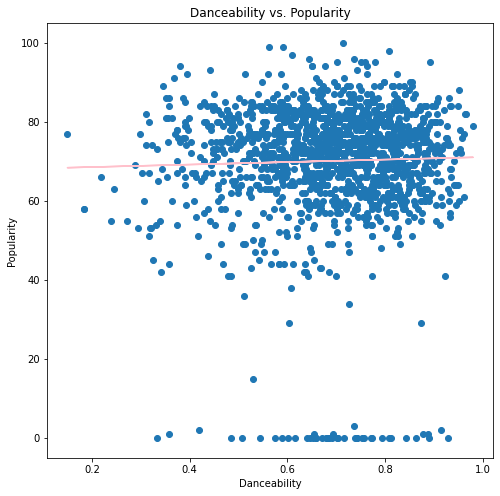

Regression Equation: Popularity = 67.909761786079 + [3.1587954] * Danceability
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          1.664e+04
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:29:46   Log-Likelihood:                         -6891.5
No. Observations:                1545   AIC:                                  1.379e+04
Df Residuals:                    1544   BIC:                                  1.379e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err         

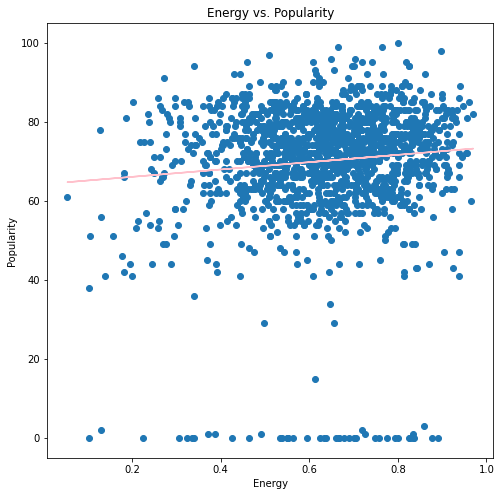

Regression Equation: Popularity = 64.21459671298454 + [9.27351017] * Energy
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                          1.441e+04
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:29:46   Log-Likelihood:                         -6992.6
No. Observations:                1545   AIC:                                  1.399e+04
Df Residuals:                    1544   BIC:                                  1.399e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

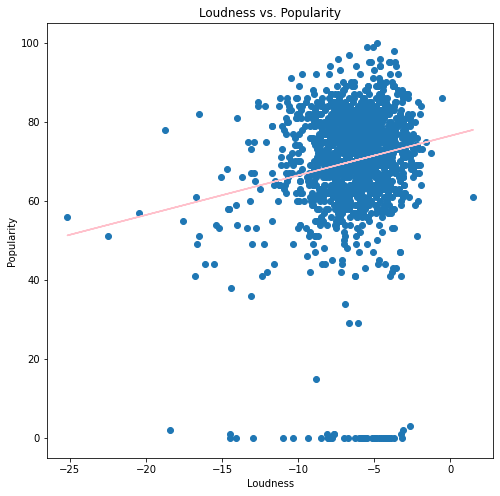

Regression Equation: Popularity = 76.44553825880948 + [1.00121983] * Loudness
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                              6172.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:29:47   Log-Likelihood:                         -7553.7
No. Observations:                1545   AIC:                                  1.511e+04
Df Residuals:                    1544   BIC:                                  1.511e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          

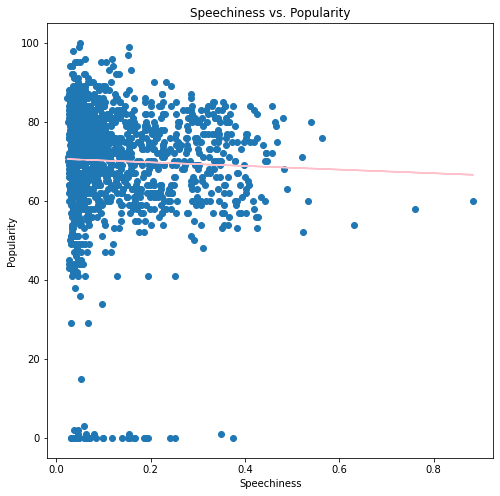

Regression Equation: Popularity = 70.65818456348572 + [-4.60038676] * Speechiness
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.523
Model:                            OLS   Adj. R-squared (uncentered):              0.523
Method:                 Least Squares   F-statistic:                              1692.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                   2.22e-250
Time:                        22:29:47   Log-Likelihood:                         -8224.9
No. Observations:                1545   AIC:                                  1.645e+04
Df Residuals:                    1544   BIC:                                  1.646e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err      

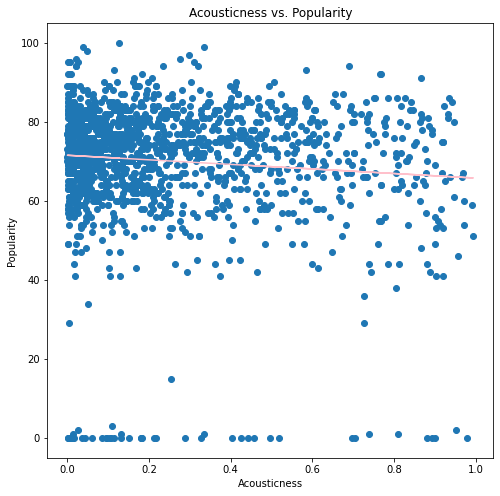

Regression Equation: Popularity = 71.52376847396538 + [-5.7679123] * Acousticness
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.453
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              1281.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                   8.91e-205
Time:                        22:29:47   Log-Likelihood:                         -8329.9
No. Observations:                1545   AIC:                                  1.666e+04
Df Residuals:                    1544   BIC:                                  1.667e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err      

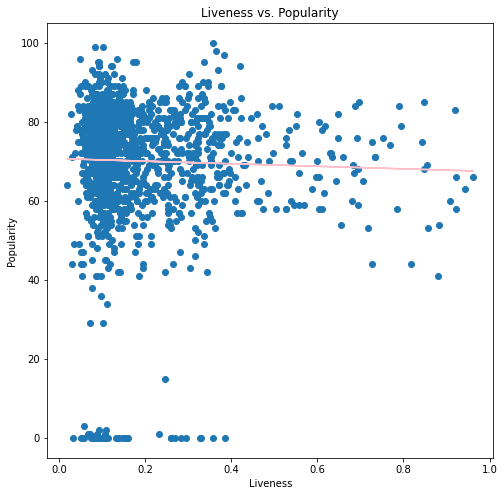

Regression Equation: Popularity = 70.67563664772617 + [-3.23569818] * Liveness
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.577
Model:                            OLS   Adj. R-squared (uncentered):              0.577
Method:                 Least Squares   F-statistic:                              2106.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                   9.35e-291
Time:                        22:29:47   Log-Likelihood:                         -8131.9
No. Observations:                1545   AIC:                                  1.627e+04
Df Residuals:                    1544   BIC:                                  1.627e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err         

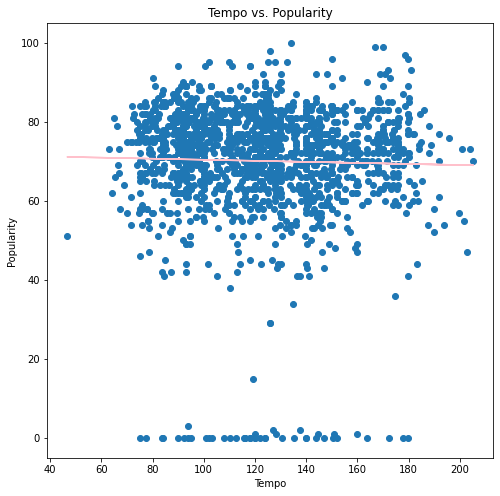

Regression Equation: Popularity = 71.72794484286324 + [-0.01334265] * Tempo
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                          1.343e+04
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:29:47   Log-Likelihood:                         -7041.3
No. Observations:                1545   AIC:                                  1.408e+04
Df Residuals:                    1544   BIC:                                  1.409e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t 

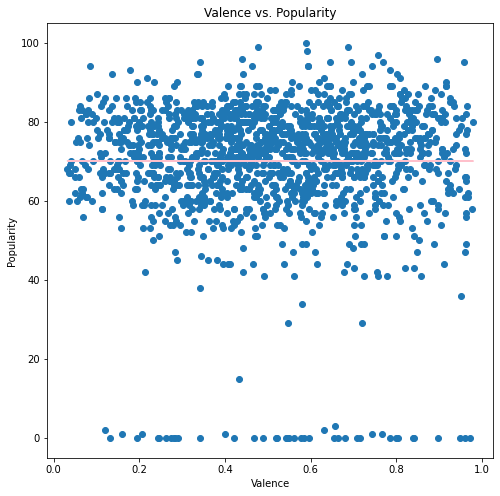

Regression Equation: Popularity = 70.12347881775857 + [-0.06636521] * Valence
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              6030.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:29:48   Log-Likelihood:                         -7568.0
No. Observations:                1545   AIC:                                  1.514e+04
Df Residuals:                    1544   BIC:                                  1.514e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          

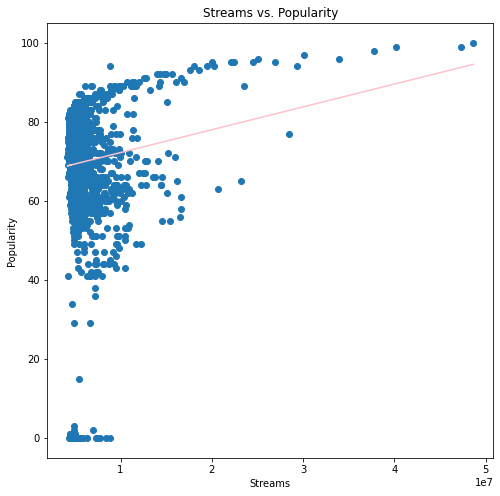

Regression Equation: Popularity = 66.42967796246622 + [5.77491505e-07] * Streams
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              4983.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:29:48   Log-Likelihood:                         -7682.9
No. Observations:                1545   AIC:                                  1.537e+04
Df Residuals:                    1544   BIC:                                  1.537e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err       

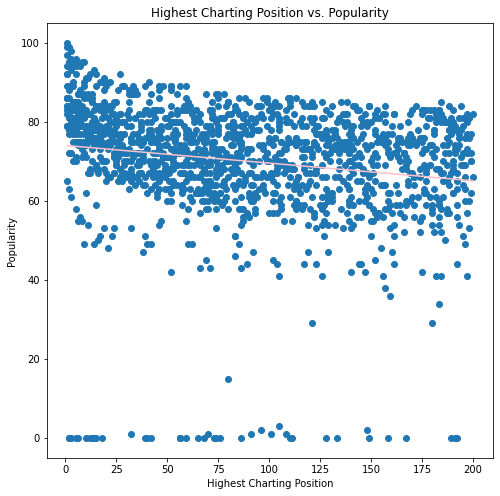

Regression Equation: Popularity = 74.01403172357772 + [-0.04468774] * Highest Charting Position
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.630
Model:                            OLS   Adj. R-squared (uncentered):              0.629
Method:                 Least Squares   F-statistic:                              2626.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:29:48   Log-Likelihood:                         -8029.0
No. Observations:                1545   AIC:                                  1.606e+04
Df Residuals:                    1544   BIC:                                  1.607e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef   

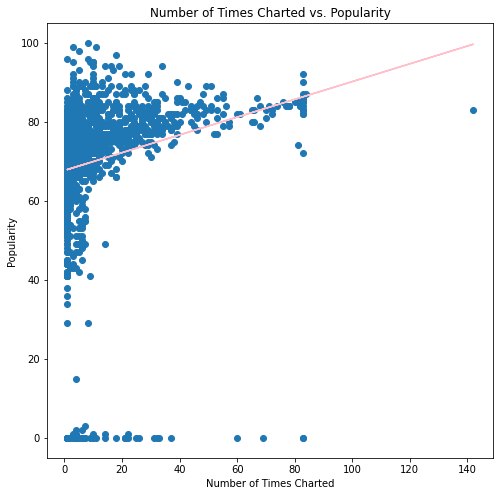

Regression Equation: Popularity = 67.6879509743515 + [0.22476015] * Number of Times Charted
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.331
Model:                            OLS   Adj. R-squared (uncentered):              0.331
Method:                 Least Squares   F-statistic:                              765.6
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                   3.41e-137
Time:                        22:29:48   Log-Likelihood:                         -8485.5
No. Observations:                1545   AIC:                                  1.697e+04
Df Residuals:                    1544   BIC:                                  1.698e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std

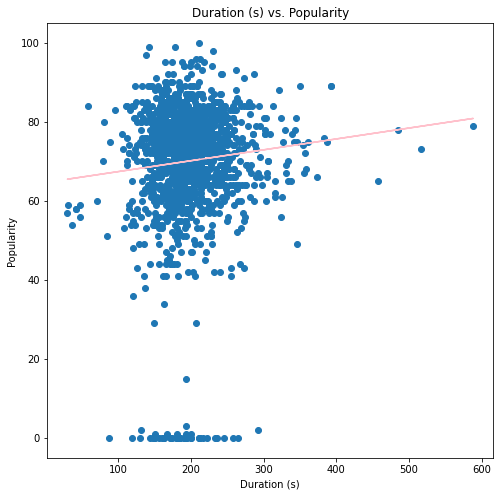

Regression Equation: Popularity = 64.63549459639407 + [0.02755281] * Duration (s)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                          1.532e+04
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:29:49   Log-Likelihood:                         -6949.7
No. Observations:                1545   AIC:                                  1.390e+04
Df Residuals:                    1544   BIC:                                  1.391e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err      

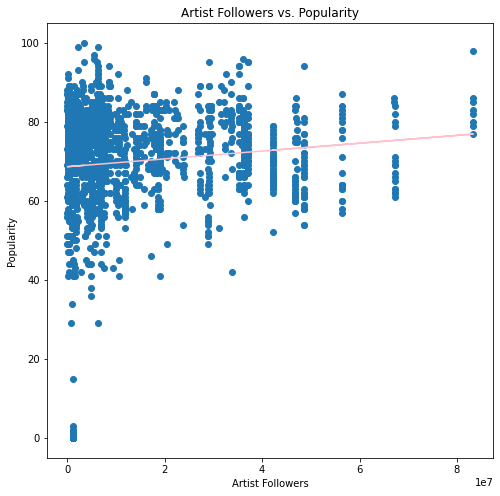

Regression Equation: Popularity = 68.63194364160215 + [9.90274081e-08] * Artist Followers
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.439
Model:                            OLS   Adj. R-squared (uncentered):              0.439
Method:                 Least Squares   F-statistic:                              1210.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                   3.17e-196
Time:                        22:29:49   Log-Likelihood:                         -8349.6
No. Observations:                1545   AIC:                                  1.670e+04
Df Residuals:                    1544   BIC:                                  1.671e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std e

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

# List of all of the relevant predictors we are graphing except for popularity
predictors_nopop = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence',
                    'Streams', 'Highest Charting Position', 'Number of Times Charted', 'Duration (s)', 'Artist Followers']

# Storing popularity for each song
popularity = df['Popularity']

# Graph each predictor against Popularity
for attr in predictors_nopop:
  fig, ax = plt.subplots(figsize = (8,8)) # So that we can plot multiple scatter plots

  # Convert each value to a float to graph scatter plots
  x = list(map(float, df[attr]))
  y = list(map(float, popularity))

  plt.scatter(x = x, y = y)
  plt.title(attr + " vs. Popularity")
  plt.xlabel(attr)
  plt.ylabel("Popularity")
  
  # Plot the linear regression line
  slope, intercept = np.polyfit(x, y, 1)
  plt.plot(x, slope*np.array(x) + intercept, color='Pink')
  plt.show()

  # Print the linear regression equation
  x = np.array(x).reshape(-1, 1)
  y = np.array(y)
  reg = linear_model.LinearRegression()
  reg.fit(x, y)
  equation = "Regression Equation: Popularity = {} + {} * " + attr
  print(equation.format(reg.intercept_, reg.coef_))

  # Print the summary statistics of each of the models
  model = sm.OLS(y, x)
  model = model.fit()
  print(model.summary())

At a first glance, most of these scatter plots do not indicate a strong, linear relationship. We can see that these same plots do not have a large R-squared value, suggesting that only a small-to-moderate percentage of the variation in Popularity can be explained by the regression. For some of the models, we can see that the slope of the regression line is flat, meaning that different values for the features result in the same Popularity rating. Additionally, we see a nonlinear shape (possibly logarithmic, square root, or something similar) for the relationship between Streams and Popularity. It may make sense to transform the Streams data accordingly. Furthermore, because there are so many observations, it will work in our favor to group the data by Popularity and then calculate and visualize the average unit of each of the features. This will help us better understand which values of the features will give us a larger average Popularity. We'll do this below using [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and observe our results.

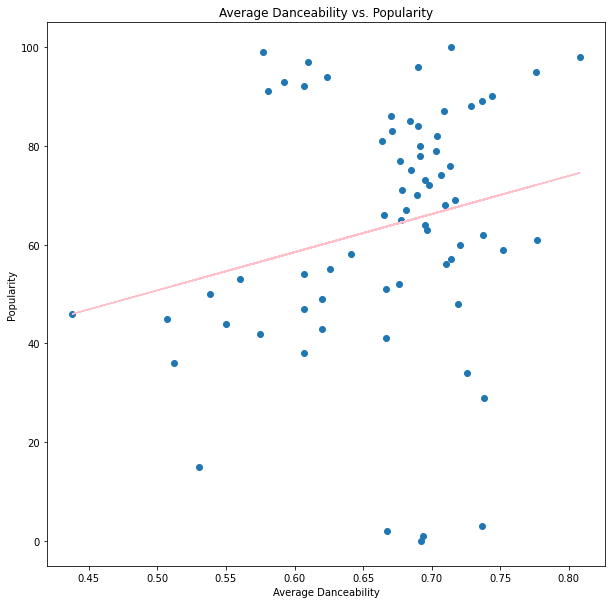

Regression Equation: Popularity = 12.168584622598154 + [77.15934939] * Danceability
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              474.7
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    2.20e-32
Time:                        22:30:04   Log-Likelihood:                         -317.63
No. Observations:                  69   AIC:                                      637.3
Df Residuals:                      68   BIC:                                      639.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err    

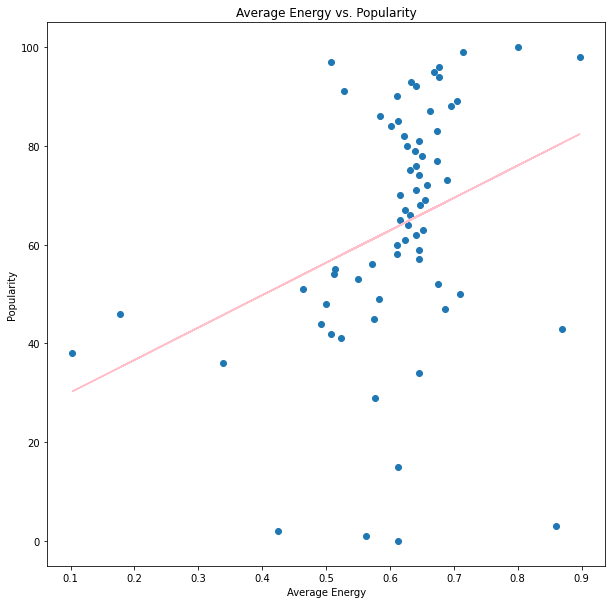

Regression Equation: Popularity = 23.53362796678239 + [65.57765882] * Energy
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              488.7
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    9.22e-33
Time:                        22:30:04   Log-Likelihood:                         -316.74
No. Observations:                  69   AIC:                                      635.5
Df Residuals:                      68   BIC:                                      637.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t

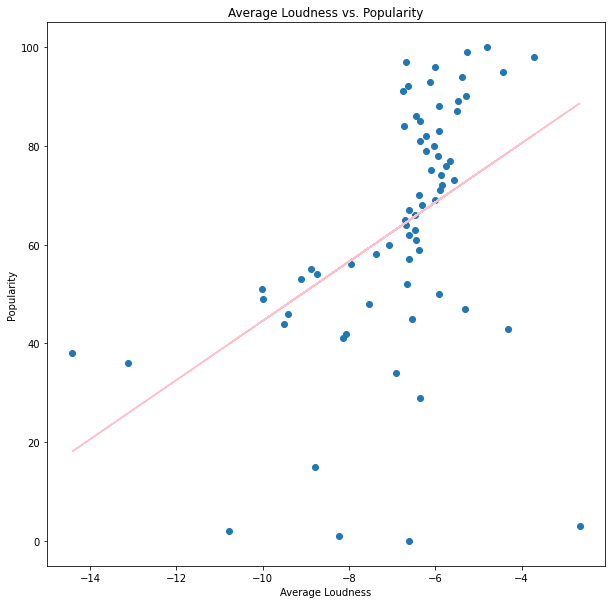

Regression Equation: Popularity = 104.48745135221633 + [5.99320212] * Loudness
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              184.7
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    4.64e-21
Time:                        22:30:04   Log-Likelihood:                         -343.99
No. Observations:                  69   AIC:                                      690.0
Df Residuals:                      68   BIC:                                      692.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err         

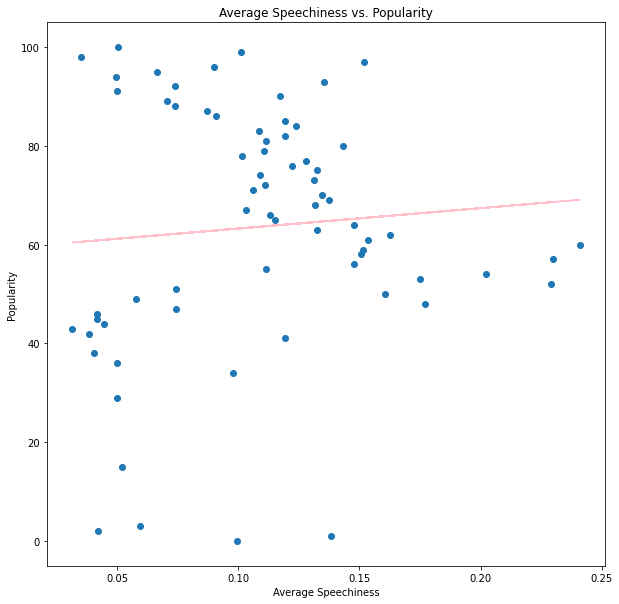

Regression Equation: Popularity = 59.12387308767028 + [41.25153108] * Speechiness
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              198.2
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    7.86e-22
Time:                        22:30:05   Log-Likelihood:                         -342.20
No. Observations:                  69   AIC:                                      686.4
Df Residuals:                      68   BIC:                                      688.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err      

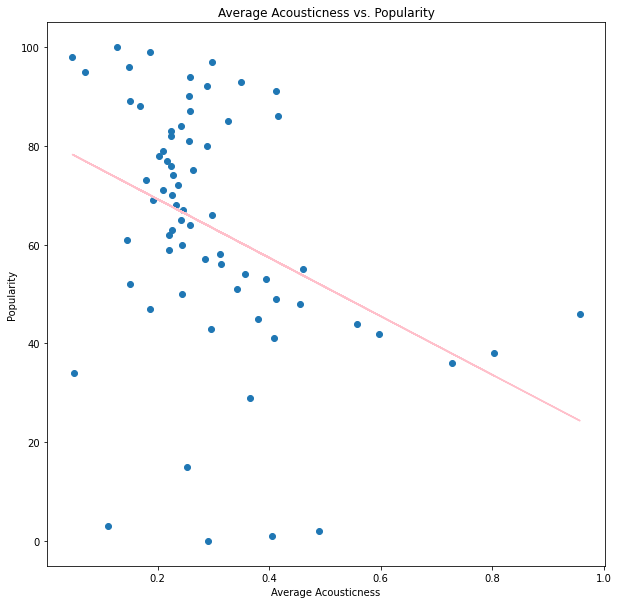

Regression Equation: Popularity = 81.0041261484628 + [-59.17277321] * Acousticness
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.572
Model:                            OLS   Adj. R-squared (uncentered):              0.566
Method:                 Least Squares   F-statistic:                              91.05
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    3.58e-14
Time:                        22:30:05   Log-Likelihood:                         -359.97
No. Observations:                  69   AIC:                                      721.9
Df Residuals:                      68   BIC:                                      724.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err     

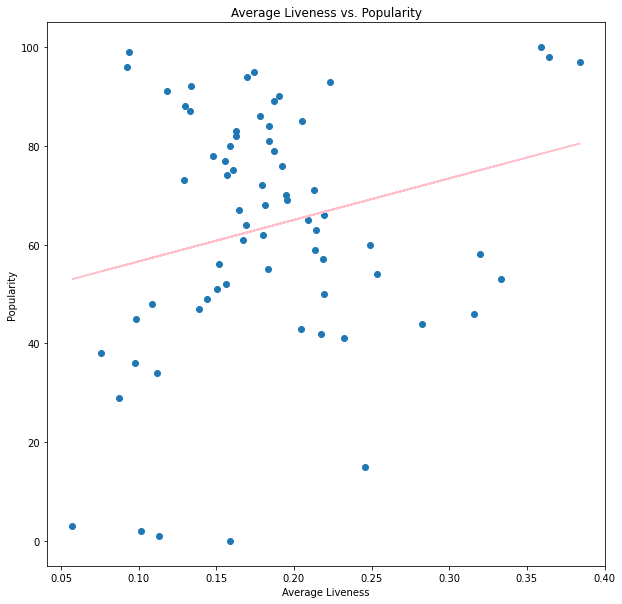

Regression Equation: Popularity = 48.19143322001601 + [84.02968388] * Liveness
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              301.2
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    1.11e-26
Time:                        22:30:05   Log-Likelihood:                         -330.91
No. Observations:                  69   AIC:                                      663.8
Df Residuals:                      68   BIC:                                      666.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err         

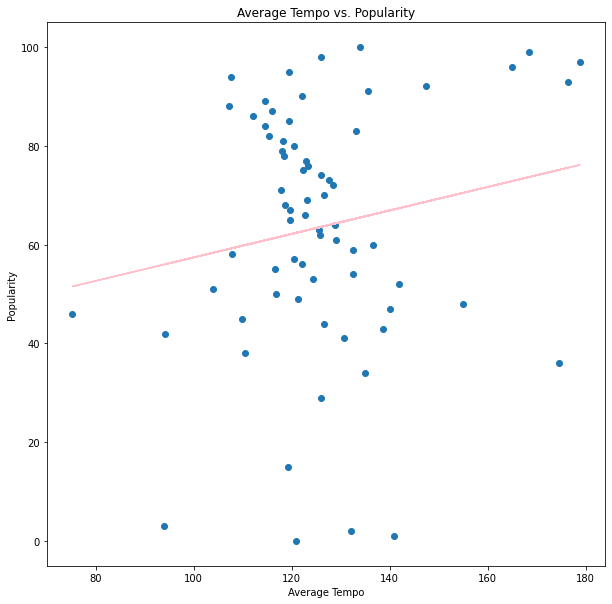

Regression Equation: Popularity = 33.65739107047048 + [0.23748545] * Tempo
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              446.7
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    1.33e-31
Time:                        22:30:05   Log-Likelihood:                         -319.45
No. Observations:                  69   AIC:                                      640.9
Df Residuals:                      68   BIC:                                      643.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t  

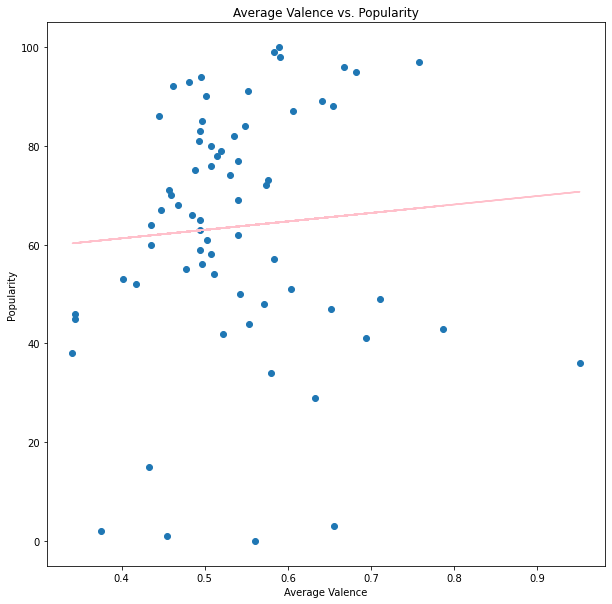

Regression Equation: Popularity = 54.418883247271474 + [17.11457514] * Valence
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              374.9
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    2.23e-29
Time:                        22:30:06   Log-Likelihood:                         -324.63
No. Observations:                  69   AIC:                                      651.3
Df Residuals:                      68   BIC:                                      653.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err         

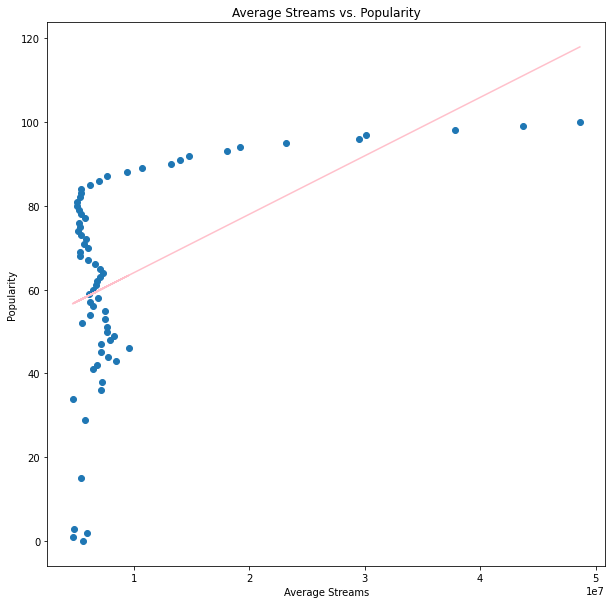

Regression Equation: Popularity = 50.07279380052918 + [1.39499193e-06] * Streams
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.658
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              130.6
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    1.76e-17
Time:                        22:30:06   Log-Likelihood:                         -352.31
No. Observations:                  69   AIC:                                      706.6
Df Residuals:                      68   BIC:                                      708.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err       

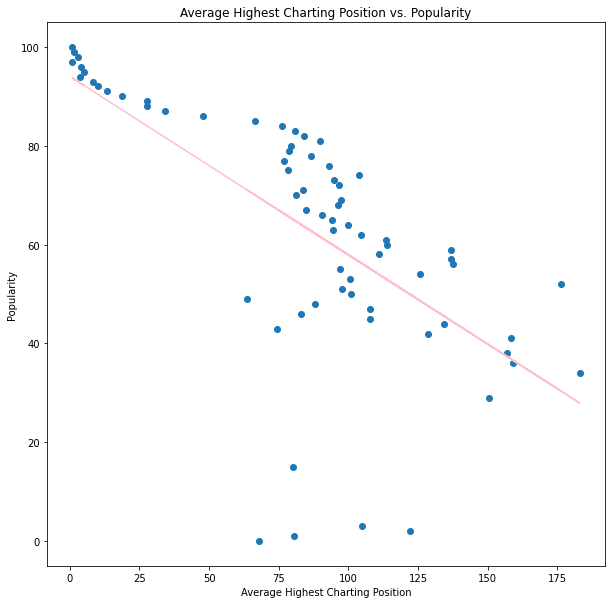

Regression Equation: Popularity = 94.05903546767829 + [-0.36134207] * Highest Charting Position
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.503
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              68.77
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    6.45e-12
Time:                        22:30:06   Log-Likelihood:                         -365.17
No. Observations:                  69   AIC:                                      732.3
Df Residuals:                      68   BIC:                                      734.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef   

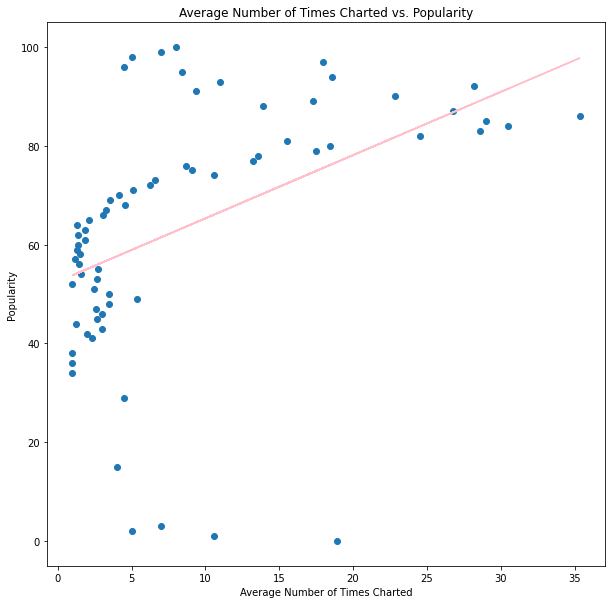

Regression Equation: Popularity = 52.50767680378103 + [1.27945098] * Number of Times Charted
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.590
Method:                 Least Squares   F-statistic:                              100.3
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    5.12e-15
Time:                        22:30:06   Log-Likelihood:                         -358.01
No. Observations:                  69   AIC:                                      718.0
Df Residuals:                      68   BIC:                                      720.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    st

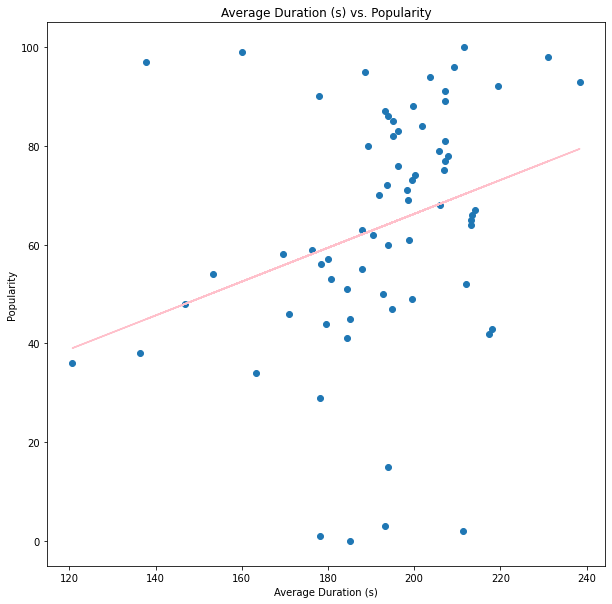

Regression Equation: Popularity = -2.289538980930949 + [0.34249299] * Duration (s)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              498.7
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    5.05e-33
Time:                        22:30:07   Log-Likelihood:                         -316.13
No. Observations:                  69   AIC:                                      634.3
Df Residuals:                      68   BIC:                                      636.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err     

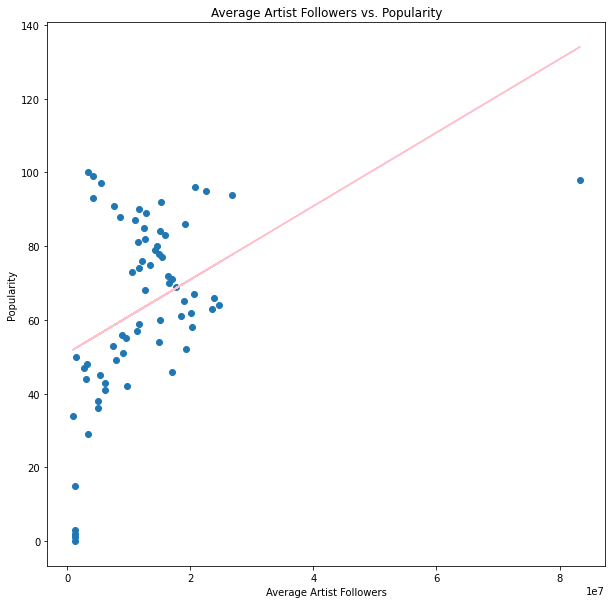

Regression Equation: Popularity = 50.99101386148147 + [9.97109486e-07] * Artist Followers
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.656
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                              129.7
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                    2.06e-17
Time:                        22:30:07   Log-Likelihood:                         -352.46
No. Observations:                  69   AIC:                                      706.9
Df Residuals:                      68   BIC:                                      709.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std e

In [ ]:
for attr in predictors_nopop:
  # Temporary dataframe with only Popularity and relevant attribute
  temp_df = df.loc[:, ['Popularity', attr]]

  # Cast Popularity and attribute to int and float, respectively, in order to group by Popularity
  temp_df["Popularity"] = temp_df["Popularity"].astype(int)
  temp_df[attr] = temp_df[attr].astype(float)

  pop_mean_df = temp_df.groupby("Popularity").mean() # Getting average attribute value for each Popularity rating

  fig, ax = plt.subplots(figsize = (10,10)) # So that we can plot multiple scatter plots

  # Convert each value to a float to graph scatter plots
  x = list(map(float, pop_mean_df[attr]))
  y = list(map(float, pop_mean_df.index))

  plt.scatter(x = x, y = y)
  plt.title("Average " + attr + " vs. Popularity")
  plt.xlabel("Average " + attr)
  plt.ylabel("Popularity")
  
  # Plot the linear regression line
  slope, intercept = np.polyfit(x, y, 1)
  plt.plot(x, slope*np.array(x) + intercept, color='Pink')
  plt.show()

  # Print the linear regression equation
  x = np.array(x).reshape(-1, 1)
  y = np.array(y)
  reg = linear_model.LinearRegression()
  reg.fit(x, y)
  equation = "Regression Equation: Popularity = {} + {} * " + attr
  print(equation.format(reg.intercept_, reg.coef_))

  # Print the summary statistics of each of the models
  model = sm.OLS(y, x)
  model = model.fit()
  print(model.summary())

As we can see, the scatter plots look **much** easier to analyze. There are some models still with a smaller R-squared value, but overall, the R-squared values seem to have increased. If you recall, we were unsure of some of the relationships since the slope was so flat. For example, we saw that Valence had a very small and **negative** slope in the original scatter plot. Now, we see a more defined, **positive** slope between Valence and Average Popularity. Now that we have some understanding of the relationships between the various song features and Popularity, let's take a look at the relationship between the Release Date and Popularity. Specifically, let's determine whether the number of days between the Release Date and the Week of the Highest Charting has any indication about the Popularity of a song.

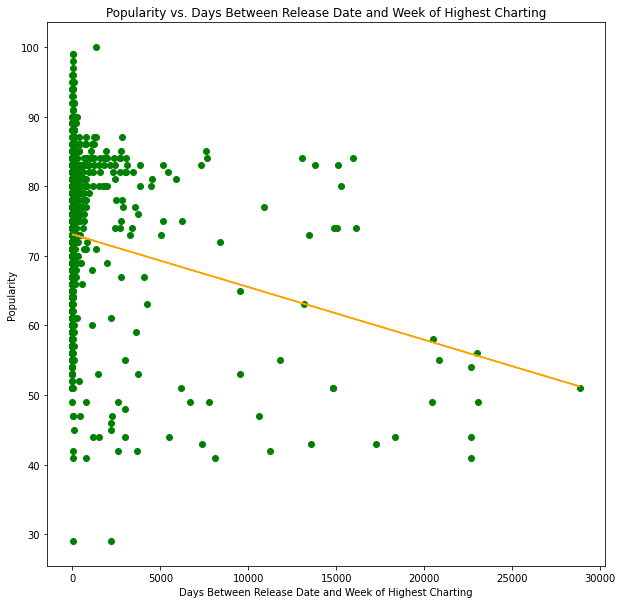

In [ ]:
import datetime

top_release_wk_distances = list()

for index, row in df.iterrows():
  wk_datetime = row['Week of Highest Charting']
  release_datetime = row['Release Date']
  distance = str(wk_datetime - release_datetime)
  if distance.startswith("-") or distance == "NaT": # Produced a negative or invalid result, which is invalid for this purpose
    top_release_wk_distances.append(-1)
  elif distance.startswith("0"): # 00:00:00 result -> topped the chart the same week it was released
    top_release_wk_distances.append(0)
  else: # Had at least a day difference between release date and week of highest charting
    top_release_wk_distances.append(int(distance.split(" ")[0]))

# Create X and Y sets, excluding -1 results
pop_filtered = list() # Stores Y values
distances_filtered = list() # Stores X values
i = 0
for index, row in df.iterrows():
  distance = top_release_wk_distances[i]
  if distance != -1:
    distances_filtered.append(distance)
    pop_filtered.append(int(row['Popularity']))
  i += 1

fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(x = distances_filtered, y = pop_filtered, color="green")
plt.xlabel("Days Between Release Date and Week of Highest Charting")
plt.ylabel("Popularity")
plt.title("Popularity vs. Days Between Release Date and Week of Highest Charting")

# Create the linear regression line
slope, intercept = np.polyfit(distances_filtered, pop_filtered, 1)
plt.plot(distances_filtered, slope*np.array(distances_filtered) + intercept, color='Orange')

plt.show()

As we see above, there appears to be a negative correlation among the days between a song's release date and week of highest charting and its popularity. In other words, songs are most popular when they are first released. There are a few songs, though, that seem to be more popular (at least 80% popularity) after 15,000 days (≈ 41 years)! One explanation for this could be [TikTok](https://www.tiktok.com/), a social media app launched in 2016 where users record short videos or dances to various songs and sounds. It has been known to ["revitalize old hits"](https://www.rollingstone.com/pro/features/tiktok-old-hits-fleetwood-mac-jack-johnson-aly-aj-1086232/) such as Fleetwood Mac’s “Dreams” which recently reentered top charts for the first time in forty years largely due to its high usage on TikTok. Now that we have some understanding of the relationships between the numerous features and Popularity, let's try to consolidate this information into a correlation matrix.

### 3.2 Correlation Matrix
A [correlation matrix](https://www.displayr.com/what-is-a-correlation-matrix/) is a table that displays the correlation coefficients between variables. Each cell tells us the value of the correlation coefficient and the sign (positive or negative relationship). Generally, a strong relationship has a value of 0.7 or greater, a weak relationship has a value less than 0.5, and a moderate relationship are any values in between 0.5 and 0.7.

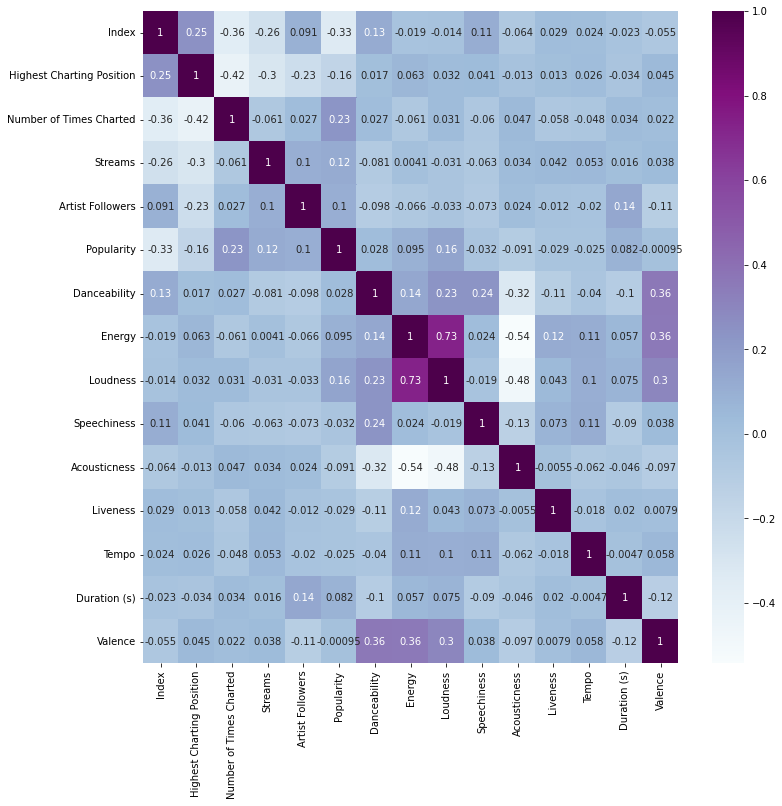

In [ ]:
import seaborn as sn
corr = df.corr() # calculate correlation

# Plotting correlation using heatmap
plt.figure(figsize=(12,12))
sn.heatmap(corr,annot=True,cmap="BuPu")

This correlation matrix clearly shows that most of these variables are not correlated with each other. The strongest relationship that we can see is the one between Energy and Loudness with a correlation coefficient of 0.73. If we are just looking at Popularity, the features that most correlate with Popularity are Number of Times Charted, Highest Charting Position, and Loudness. However, even then, these relationships are very weak. Another thing to note with this correlation matrix in mind is that [multicollinearnity](https://www.statisticshowto.com/multicollinearity/) is not much of an issue. This means that no two predictors themselves (not including Popularity) correlate with each other. The issue with multicollinearity is that it creates redundant information and could lead to overfitting. The only features that may contribute to this issue are Energy and Loudness, but even their relationship is not too strong. Let's now illustrate some information about the genres and the artists with Bar Graphs!

### 3.3 Bar Graphs
Since we do have some categorical data in our dataframe, we will need to use Bar Graphs to illustrate this information. First, we'll display the data regarding Genres and then we'll display the data regarding Artists. 

Text(0.5, 1.0, 'Top 200 Chart Song Frequency by Genre')

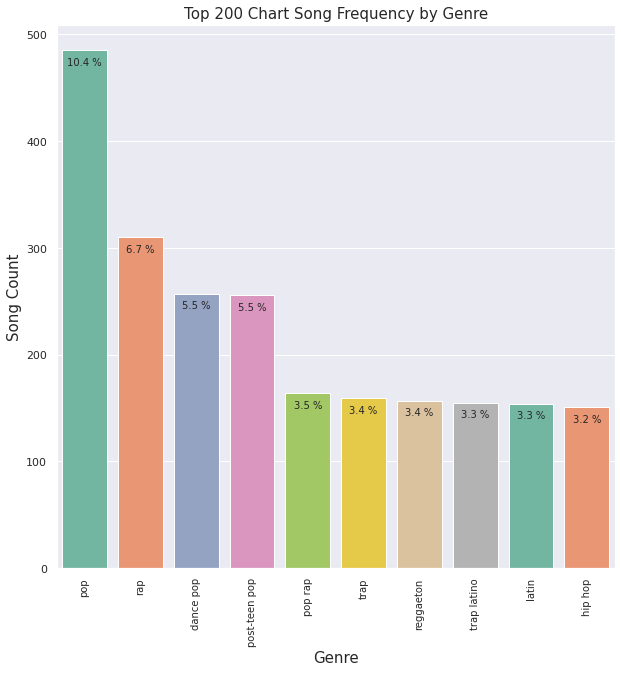

In [ ]:
genres = list()
genre_counts = dict()
# Iterate through the exploded dataframe and check for the number of songs for each genre
for index, row in exploded_df.iterrows():
  genre = row['Genre List']
  if genre in genre_counts:
    genre_counts[genre] = genre_counts[genre] + 1
  else:
    genre_counts[genre] = 1
    genres.append(genre)

# Keeping track of the top 10 genres
x_topgenres = list()
y_topgenres = list()

total_values = 0
for key in genre_counts.keys():
  total_values += genre_counts[key]

# Calculate the percentage of songs for each genre
genre_pct = list()
index = 0
for (key, value) in sorted(genre_counts.items(), key=lambda x: x[1], reverse=True):
  if index < 10:
    x_topgenres.append(key)
    y_topgenres.append(value)
    pct = round((float(value) / float(total_values)) * 100, 1)
    genre_pct.append(str(pct) + " %")
  index += 1

sn.set(rc = {'figure.figsize':(10,10)})
ax1 = sn.barplot(x=x_topgenres, y=y_topgenres, palette="Set2")
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10, rotation=90)

# Add the percentages as annotations on the bar chart
i = 0
for p in ax1.patches:
    ax1.annotate(genre_pct[i], (p.get_x() + p.get_width() / 2., 
                  p.get_height()), ha = 'center', 
                 va = 'center', size=10,xytext = (0, -12), 
                textcoords = 'offset points')
    i += 1


plt.xlabel("Genre", size=15)
plt.ylabel("Song Count", size=15)
plt.title("Top 200 Chart Song Frequency by Genre", size=15)


Your first observation may be that these don't seem like all of the genres in the dataframe, and you would be right. There are many different niche genres that the dataframe holds, so if we were to make a Bar Graph with all of the genres, it would not be readable since there would be so many bars. Also, even if we did include every genre, the song count for most of these genres would be extremely low. Hence, we can show the top 10 genres for the songs that made the charts. As we can see, the genres relating to pop are the most apparent in this list with the pop genre itself having the largest song count (and making up 10.4% of songs in the dataset). Since we are more concerned with Popularity, let's see which of these genres have the largest average Popularity.

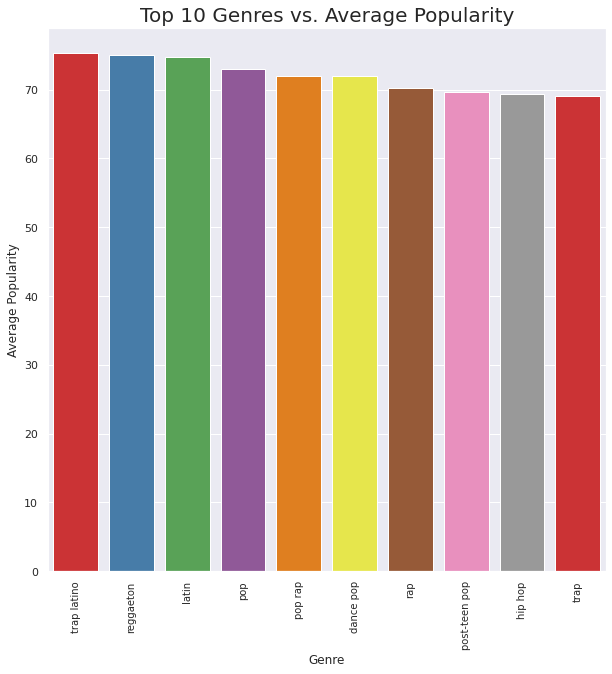

In [ ]:
import statistics
genre_pop_counts = dict()

# Add the top genres and their associated Popularity to dictionary
for index, row in exploded_df.iterrows():
  genre = row['Genre List']
  if genre in x_topgenres:
    if genre in genre_pop_counts:
      genre_pop_counts[genre].append(int(row['Popularity']))
    else:
      genre_pop_counts[genre] = [int(row['Popularity'])]

# Dictionary to keep track of average Popularity for each top 10 genre
genre_pop_counts_new = dict()

for key, val in genre_pop_counts.items():
  genre_pop_counts_new[statistics.mean(val)] = key

# Make lists with the average Popularity in descending order
x = list()
y = sorted(genre_pop_counts_new.keys(), reverse = True)

for val in y:
  x.append(genre_pop_counts_new[val])

sn.set(rc = {'figure.figsize':(10,10)})

ax1 = sn.barplot(x=x, y=y, palette="Set1")
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10, rotation=90)
ax1.set_title("Top 10 Genres vs. Average Popularity", size=20)
ax1.set_xlabel("Genre")
ax1.set_ylabel("Average Popularity")
plt.show()

Interesting! It seems like Trap Latino, Reggaeton, and Latin have the greatest average Popularity even though they only make up of approximately 3.3% of the songs individually. This suggests that songs of these genres may not pop up on the charts too often, but when they do, they are more consistent towards a greater Popularity rating. Overall, comparing with the previous bar graph, although there are some stark contrasts between the number of songs for some of the genres, the average popularity of each of these genres is very similar. 

Now that we have a holistic understanding of the data and the various features' significance with respect to Popularity, let's determine how well these different features can predict Popularity. We will dive deep into some machine learning algorithms and conclude with which algorithms give us the most accurate predictions when it comes to judging a song's popularity!

# *4. Machine Learning*

Machine learning algorithms help us automatically build models from existing data to make future feature predictions. Within our example, we are going to try to predict a song's popularity (on a scale of 0-100) from  other features in the dataframe. Namely, we will build our models using songs' Highest Charting Position, Number of Times Charted, Week of Highest Charting, Streams, Artist Followers, Release Date, Genre, Danceability, Energy, Loudness, Speechiness, Acousticness, Liveness, Tempo, Duration (s), and Valence. It is our hope that all of these features are somehow correlated to a song's popularity and thus that our trained models will be able to predict popularity from them well. We will try out a variety of regression models as follows:
<ol type="1">
<li>Linear Regression</li> 
<li>Ridge Regression</li> 
<li>Random Forest Regression</li> 
</ol>

Before we build our models, we need to drop columns that may be irrelevant for prediction. First, we should not use Index to predict Popularity, as that is extremely specific to this dataset and would not lead to a generalizable model. Next, though Release Date, Artist, and Week of Highest Charting Position may be good indicators of a song's popularity, we want to focus on our model's reproducability to other datasets (potentially future ones, too). Thus, having date specific metrics may not be the best in building our model. It could potentially lead to [overfitting](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/), where the model performs excellently on the training set, but may not perform accurately against unseen data (especially outside datasets). Additionally, we do not expect a song's name to have a large impact on its popularity. As per Artist, artists continually enter and exit the music space, and thus, in the same spirit of reproducibility, we will omit this feature from our ML prediction space. Artist Followers is a more general metric to capture the idea of a song's artist.

In [ ]:
cleaned_data = df.copy(deep=True)
cleaned_data = cleaned_data.drop(columns=["Artist", "Song Name", "Week of Highest Charting", "Release Date", "Index"])
cleaned_data.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (s),Valence
0,1,8,48633449,3377762,"['indie rock italiano', 'italian pop']",100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211.560,0.589
1,2,3,47248719,2230022,['australian hip hop'],99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141.806,0.478
2,1,11,40162559,6266514,['pop'],99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178.147,0.688
3,3,5,37799456,83293380,"['pop', 'uk pop']",98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231.041,0.591
4,5,1,33948454,5473565,"['lgbtq+ hip hop', 'pop rap']",96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212.000,0.894


Next, before we can train our models, we need to convert categorical data into numeric values. Without doing so, the model will not be able to be trained properly. We are "preprocessing" our data for machine learning, and thus we can [sklearn's preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to make this conversion.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Encode Genre to a numeric value
cleaned_data['Genre'] = le.fit_transform(cleaned_data['Genre'])
cleaned_data.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (s),Valence
0,1,8,48633449,3377762,276,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211.560,0.589
1,2,3,47248719,2230022,63,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141.806,0.478
2,1,11,40162559,6266514,364,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178.147,0.688
3,3,5,37799456,83293380,363,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231.041,0.591
4,5,1,33948454,5473565,312,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212.000,0.894


As evident above, the once string-like Genre column has been replaced by numeric values, such as 276 and 364, corresponding to that song's genre(s). Now, our data is ready for model training. We are going to the standard methodology, holdout cross-validation: we will randomly divide our data into two disjoint sets (training set and testing set), apply a ML regression algorithm to the training set (generating a hypothesis *h*), and measure *h*'s performance on the test set.

In [ ]:
from sklearn.model_selection import train_test_split

# Conduct a 70/30 split across the data, placing rows into training_data 
# and testing_data respectively
training_data, testing_data = train_test_split(cleaned_data, test_size=0.3, random_state=42)

print(f"Number of training examples: {training_data.shape[0]}")
print(f"Number of testing examples: {testing_data.shape[0]}")

testing_data.head()

Number of training examples: 1081
Number of testing examples: 464


,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (s),Valence
1505,148,1,6159873,6189454,261,61,0.762,0.054,-16.735,0.0503,0.9470,0.1240,96.838,160.267,0.339
547,143,42,5003825,29566516,211,83,0.921,0.537,-5.723,0.0804,0.5560,0.1020,128.009,135.090,0.711
1278,51,1,10058303,35340069,96,63,0.555,0.619,-7.918,0.0314,0.0323,0.0917,95.032,195.813,0.141
532,144,1,5897983,5831194,264,69,0.793,0.650,-3.944,0.3970,0.3710,0.8540,128.111,243.750,0.809
1103,21,15,4769996,11821805,317,73,0.775,0.720,-5.353,0.1930,0.0236,0.1140,155.086,234.627,0.490


We are using supervised learning techniques, aiming to find a simple hypothesis fairly consistent with the training data. Thus, we need to separate the testing data into two groups: [features and labels](https://www.jeremyjordan.me/preparing-data-for-a-machine-learning-model/). We are trying to predict popularity *from* the features, and thus Popularity will be our label and the rest of the dataframe minus the Popularity will be the features.

In [ ]:
# Drop Popularity column from testing data
testing_data_pop = testing_data['Popularity'] # Label
testing_data = testing_data.drop('Popularity', axis=1) # Features
testing_data.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (s),Valence
1505,148,1,6159873,6189454,261,0.762,0.054,-16.735,0.0503,0.9470,0.1240,96.838,160.267,0.339
547,143,42,5003825,29566516,211,0.921,0.537,-5.723,0.0804,0.5560,0.1020,128.009,135.090,0.711
1278,51,1,10058303,35340069,96,0.555,0.619,-7.918,0.0314,0.0323,0.0917,95.032,195.813,0.141
532,144,1,5897983,5831194,264,0.793,0.650,-3.944,0.3970,0.3710,0.8540,128.111,243.750,0.809
1103,21,15,4769996,11821805,317,0.775,0.720,-5.353,0.1930,0.0236,0.1140,155.086,234.627,0.490


Next, we will set the training data into x_train and y_train accordingly, separating them into features (all columns besides Popularity) and labels (just the Popularity column) as described above. We call [DataFrame.shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) on our x training, y training, and testing data sets to ensure they are sized correctly (correct number of rows and columns).

In [ ]:
# Load the training data into x_train and y_train respectively
x_train = training_data.drop('Popularity',axis=1)
y_train = training_data['Popularity']

# Print the shapes of x_train, y_train, and testing data 
x_train.shape, y_train.shape, testing_data.shape

((1081, 14), (1081,), (464, 14))

### 4.1 Linear Regression

We will first train a Linear Regression model. We can do so in two simple steps: calling an instance of [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), imported from the library below, and fit the model based on our training data. Within the parentheses of declaring the instance, we could include hyperparameters. For our Linear Regression model, we choose not to use any, as many are not applicable or beneficial to our case, but we will use some in the models to follow. Check out the hyperlinked scikit-learn page above to see the hyperparameter options for a Linear Regression model. 

We score the performance of our model in multiple ways. First, we call score(), which returns the coefficient of determination of the prediction (R^2 value: a statistical measure of how well the regression predictions estimate the actual data points). Then, we will look at the model's root mean squared error (RMSE). This measures the average error produced by the model in predicting the popularity for a song. In general, the higher the R^2 and the lower the RMSE value, the better fit a model is.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# Creating and fitting the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Scoring the model (R^2 value)
print("R^2 value: " + str(linear_model.score(x_train,y_train)))

# Creating popularity predictions from the model
linear_predictions = linear_model.predict(testing_data)

# Calculating the RMSE
print("Root mean squared error: " + str(math.sqrt(mean_squared_error(testing_data_pop, linear_predictions))))

lm_result = pd.DataFrame({'Predicted Popularity':linear_predictions,'Actual Popularity':testing_data_pop})
print(lm_result)

R^2 value: 0.14793991621109492
Root mean squared error: 16.09359520848455
      Predicted Popularity  Actual Popularity
1505             52.436337                 61
547              74.623702                 83
1278             74.487406                 63
532              67.468160                 69
1103             71.721545                 73
...                    ...                ...
1206             72.545538                 70
110              81.300747                 86
890              75.097637                 78
733              70.073812                 72
101              69.108219                 86

[464 rows x 2 columns]


We see that the Linear Regression model produces an R^2 value of .148 and a RMSE value of 16.1. Since we have no other models to compare this too, we cannot say much about it thus far, besides that 14.8% percent does not seem to be very high (indicating the regression estimates may not be the best estimators of a song's popularity). 

To further enhance our analysis, we'll create a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html). A pairplot will show us the relationship between predicted popularity and actual popularity, as well as the univariate distribution of both variables independently. The default univariate distribution in a seaborn pairplot is a bar chart; to make this easier to visually analyze, we'll convert it to a kernel density estimation plot. Also, we'll add a linear regression line to each of the predicted popularity vs. actual popularity scatterplots, as that will help us better interpret the slope of their relationship.

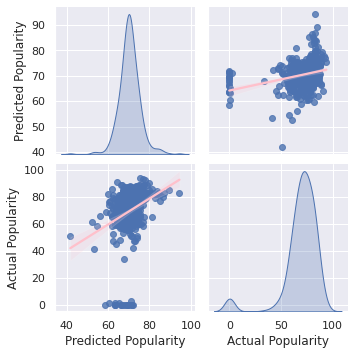

In [ ]:
sn.pairplot(lm_result, diag_kind='kde', kind="reg", plot_kws={'line_kws':{'color':'pink'}})

From the plot, looking at the univariate distributions of actual popularity and predicted popularity, we see dissimilar shapes. Actual popularity seems to be skewed left, with a local maximum at 0, while predicted popularity seems to follow a symmetrical, normal distribution more closely, centered at ~70. In looking at the top right graph, which plots predicted popularity vs. actual popularity, we see that the slope is not close to 1 (which would mean that the two variables increase at the same rate). From the cluster of points on the left, it seems that predicted popularity did not garner any predictions of popularity 0 or close to 0, but started giving popularity scores of around 55. We'll look at ridge regression next to see if we can produce better results.

### 4.2 Ridge Regression

We follow the exact same steps we took in 4.1, but this time swapping a LinearRegression() instance for a [Ridge()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) instance. We again choose to omit hyperparameters for our instance, but the options are available on the hyperlinked page.

In [ ]:
from sklearn.linear_model import Ridge
# Creating and fitting the Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

# Scoring the model (R^2 value)
print("R^2 value: " + str(ridge_model.score(x_train,y_train)))

# Creating popularity predictions from the model
ridge_predictions = ridge_model.predict(testing_data)

# Calculating the RMSE
print("Root mean squared error: " + str(math.sqrt(mean_squared_error(testing_data_pop, ridge_predictions))))

ridge_result = pd.DataFrame({'Predicted Popularity':ridge_predictions,'Actual Popularity':testing_data_pop})
print(ridge_result)

R^2 value: 0.14793675491280045
Root mean squared error: 16.09265457441622
      Predicted Popularity  Actual Popularity
1505             52.417560                 61
547              74.617167                 83
1278             74.444984                 63
532              67.579258                 69
1103             71.706418                 73
...                    ...                ...
1206             72.544668                 70
110              81.318011                 86
890              75.053412                 78
733              70.078407                 72
101              69.127881                 86

[464 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.25784e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


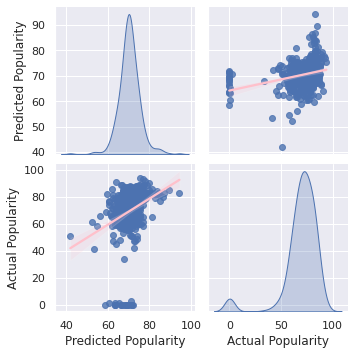

In [ ]:
sn.pairplot(ridge_result, diag_kind='kde', kind="reg", plot_kws={'line_kws':{'color':'pink'}})

Unfortunately, we get practically the same performance measurements as our Linear Regression model. The R^2 and RMSE values are extremely similar (also .148 and 16.1, respectively). Looking at the pairplot, we see a similar trend: actual popularity is skewed left, while predicted popularity is approximately normally distributed with a center at 70. Additionally, the slope on the graph between predicted popularity and actual popularity is not close to 1. Let's shift gears a little and try Random Forest Regression.

### 4.3 Random Forest Regression

Similarly, to create our Random Forest Regression model, we can follow the steps taken in 4.1. We will declare a [RandomForestRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) instance instead, though. This time, we'll set a value for hyperparameter n_estimators, the number of trees in the forest, different from the default 100. To speed up our computation (as a larger n_estimators value is computationally slower), we'll use 50. We'll also set a random_state hyperparameter, so that each time we re-run the model we will get the same metrics.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Creating and fitting the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=50, random_state=41)
rf_model.fit(x_train,y_train)

# Scoring the model (R^2 value)
print("R^2 value: " + str(rf_model.score(x_train,y_train)))

# Creating popularity predictions from the model
rf_predictions = rf_model.predict(testing_data)

# Calculating the RMSE
print("Root mean squared error: " + str(math.sqrt(mean_squared_error(testing_data_pop, rf_predictions))))

rf_result = pd.DataFrame({'Predicted Popularity':rf_predictions,'Actual Popularity':testing_data_pop})
print(rf_result)

R^2 value: 0.9627388335915014
Root mean squared error: 7.522436211210046
      Predicted Popularity  Actual Popularity
1505                 58.70                 61
547                  81.04                 83
1278                 64.68                 63
532                  61.04                 69
1103                 74.16                 73
...                    ...                ...
1206                 74.16                 70
110                  83.08                 86
890                  77.66                 78
733                  67.18                 72
101                  65.88                 86

[464 rows x 2 columns]


Wow! Our Random Forest Regression model seems to perform way better than the Linear Regression and Ridge Regression models. Its R^2 value is .963, meaning that regression predictions approximate the actual data points pretty well. Also, its RMSE value is 7.5, which is less than half of that of the other models (meaning less average error). Even by visually scanning the printed dataframe, we can see that the predictions seem to be sizably closer overall than those of the other models. To further confirm this improvement in performance, we'll compare predicted versus actual popularities in a pairplot once again.

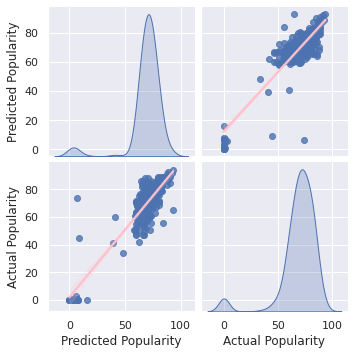

In [ ]:
sn.pairplot(rf_result, diag_kind='kde', kind="reg", plot_kws={'line_kws':{'color':'pink'}})

First, we see that both the actual popularity and predicted popularity data points begin at 0, which is an improvement from our last two models (where predicted popularity scores began at ~50). Looking at the univariate distributions, we see much more similar shapes: actual popularity and predicted popularity are both skewed left, with a local maximum at 0. Their global maximums seem to be centered at the same spot, at around 75. Analyzing the predicted popularity versus actual popularity plots, we can see that the slope is far closer to 1, meaning that the two variables increase practically at the same rate (and hence the predictions are a strong estimator of the actual popularities)! We acknowledge that there are some outliers below and above the linear regression line, but overall this model seems to be performing much better than the prior ones.

# *5. Conclusion*

Overall, we've learned a good bit about how a song's features is related to its popularity, at least as determined by Spotify. For example, we learned that a song is most popular when it is first released. Though even the strongest relationships between features and popularity seemed to appear relatively weak (correlations of .16, -.16, and .23, as per the correlation matrix), we were still able to predict a song's popularity from its features pretty well when they were used in conjunction in the Random Forest Regression model. On the other hand, the Linear and Ridge Regression models performed poorly, and thus more data may be needed to strengthen the efficacy of those models.

Nonetheless, popular music changes often, with [wildly different tastes recorded from generation to generation](https://www.saturdayeveningpost.com/2019/11/the-beat-goes-on-and-on-why-does-every-generation-hate-the-music-that-comes-after-it/#:~:text=The%20only%20constant%20in%20popular,have%20one%20hit%20and%20fade.). Additionally, since our data is from 2020 and 2021, which is also when TikTok became increasingly popular, there is no tell as to which songs will rise in popularity. This makes predicting the popularity of music in the future extremely difficult even with scores of input features. To better generalize our model, we could consider looking at data from a wider timespan (instead of only the past two years). This may help capture differences in taste recorded between generations. Also, another future direction may be to compare and contrast popularity-feature correlations in a similar dataset produced by Apple Music, Spotify's main music streaming competitor. Since "Popularity" is a measure subjective to Spotify in this case, it may be interesting if Apple Music classifies popularity any differently and/or if its song features more strongly correlate with popularity scores.